In [2]:
import pickle 
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns  
import plotly.express as px

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, lars_path
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

#Settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
seed =123

In [6]:
with open('../data/processed/selected_flats_model_df_pre_dummy.pkl', 'rb') as read_file:
    selected_flats_model_df_pre_dummy = pickle.load(read_file)    
    
with open('../data/processed/selected_flats_model_df_final.pkl', 'rb') as read_file:
    selected_flats_model_df_final = pickle.load(read_file)

In [8]:
X = selected_flats_model_df_final.drop('Asking_log',axis = 1).astype(float)
y = selected_flats_model_df_final['Asking_log'].astype(float)

#Split the data 60 - 20 - 20 train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=seed)


In [9]:
selected_ols_model_log_price = sm.OLS(y_train, sm.add_constant(X_train))
selected_ols_results_log_price = selected_ols_model_log_price.fit()

selected_ols_results_log_price.summary()

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/Users/admin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1294: RuntimeWarning:

invalid value encountered in true_divide

/Users/admin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/Users/admin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/Users/admin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asking_log   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     400.2
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:14:15   Log-Likelihood:                 1135.0
No. Observations:                 693   AIC:                            -2118.
Df Residuals:                     617   BIC:                            -1773.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                7.8035      0.047    164.784      0.000       7.710       7.896
Asking                            1.522e-06   5.03e-08     30.243      0.000    1.42e-06    1.62e-06
PSF                                  0.0002   5.14e-05      3.086      0.002    5.77e-05       0.000
Bedrooms                             0.0049      0.004      1.203      0.229      -0.003       0.013
Bathrooms                            0.0047      0.003      1.572      0.117      -0.001       0.011
Corner Unit                          0.0140      0.005      3.104      0.002       0.005       0.023
Renovated                            0.0022      0.005      0.481      0.630      -0.007       0.011
Air Conditioning                     0.0118      0.005      2.242      0.025       0.001       0.022
Water Heater                         0.0111      0.005      2.202      0.028       0.001       0.021
Cooker Hob/hood                     -0.0081      0.005     -1.657      0.098      -0.018       0.001
Balcony                             -0.0026      0.006     -0.460      0.646      -0.014       0.008
Original Condition                  -0.0118      0.006     -1.819      0.069      -0.025       0.001
Hairdryer                            0.0049      0.013      0.381      0.703      -0.020       0.030
City View                           -0.0028      0.007     -0.424      0.672      -0.016       0.010
Bombshelter                         -0.0033      0.005     -0.609      0.543      -0.014       0.007
Park/greenery View                   0.0075      0.004      1.699      0.090      -0.001       0.016
Walk-in-wardrobe                    -0.0012      0.009     -0.129      0.897      -0.019       0.017
Maidsroom                           -0.0049      0.011     -0.457      0.648      -0.026       0.016
Intercom                            -0.0294      0.020     -1.448      0.148      -0.069       0.010
Sea View                            -0.0646      0.017     -3.850      0.000      -0.098      -0.032
Colonial Building                    0.0587      0.045      1.309      0.191      -0.029       0.147
Bathtub                              0.0287      0.018      1.591      0.112      -0.007       0.064
Private Garden                      -0.0069      0.030     -0.227      0.820      -0.067       0.053
Outdoor Patio                        0.0398      0.028      1.416      0.157      -0.015       0.095
Terrace                              0.0008      0.043      0.018      0.986      -0.084       0.085
Private Lift                        -0.0079      0.040     -0.198      0.843      -0.086       0.070
Meeting Rooms                       -0.0584      0.041     -1.421      0.156      -0.139       0.022
Roof Terrace                         0.0223      0.04

In [ ]:
df_OLS_evaluated = selected_flats_model_df_final.drop(['Corner Unit', 'Renovated', 'Air Conditioning', 'Water Heater', 
                'Cooker Hob/hood', 'Balcony', 'Original Condition', 'Hairdryer', 'City View', 
                'Bombshelter', 'Park/greenery View', 'Walk-in-wardrobe', 'Maidsroom', 'Sea View',
                'Colonial Building', 'Bathtub', 'Private Garden', 'Outdoor Patio', 'Private Lift',
                'Roof Terrace', 'Swimming Pool View', 'Age', 'Model_edited_Dbss', 'Model_edited_Design & Built',
                'Model_edited_New Generation', 'Model_edited_Others', 'Model_edited_Premium Apartment',
                'HDB Town_Hougang', 'HDB Town_Punggol','Land Tenure_LEASEHOLD/99 years', 'Intercom'],axis = 1)

In [4]:
X = df_OLS_evaluated.drop('Asking_log',axis = 1).astype(float)
y = df_OLS_evaluated['Asking_log'].astype(float)

#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=seed)

In [5]:
# This step fits the Standard Scaler to the training data

std = StandardScaler()
std.fit(X_train.values)

# This step applies the scaler to the train set.
X_train_scaled = std.transform(X_train.values) 

# This step applies the scaler to the validation set.
X_val_scaled = std.transform(X_val.values)

## Apply the scaler to the test set
X_test_scaled = std.transform(X_test.values)

# This step fits the Standard Scaler to the train_val data

std = StandardScaler()
std.fit(X_train_val.values)

# This step applies the scaler to the train_val set.
X_train_val_scaled = std.transform(X_train_val.values) 

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# Run the cross validation, find the best alpha
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled, y_train)

# This is the best alpha value it found 
lasso_model.alpha_

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

0.01

In [39]:
## Fit a LASSO model on the standardized data

lasso_model_1 = Lasso(lasso_model.alpha_)
lasso_model_1.fit(X_train_scaled, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
list_of_feature_impt_lasso_1 = sorted(list(zip(X_train.columns, lasso_model_1.coef_.round(5))),key=lambda x: x[1], reverse = True)
list_of_feature_impt_lasso_1

[('PSF', 0.21177),
 ('Property Type_HDB 5 Rooms', 0.18024),
 ('Property Type_HDB Executive', 0.17127),
 ('Property Type_HDB 4 Rooms', 0.07839),
 ('Property Type_HDB Jumbo', 0.04791),
 ('Bedrooms', 0.04223),
 ('Model_edited_Model A', 0.01606),
 ('HDB Town_Bishan', 0.01084),
 ('Model_edited_Terrace', 0.00995),
 ('Model_edited_Maisonette', 0.00618),
 ('Bathrooms', 0.00536),
 ('HDB Town_Serangoon', 0.00293),
 ('Model_edited_Jumbo', 0.00188),
 ('Model_edited_Executive Apartment', 0.001),
 ('HDB_Region_East', 0.00069),
 ('HDB Town_Tampines', 0.00068),
 ('Model_edited_Apartment', 0.0),
 ('Model_edited_Improved', -0.0),
 ('Model_edited_Multi Generation', 0.0),
 ('Model_edited_Simplified', -0.0),
 ('HDB Town_Bedok', -0.0),
 ('HDB Town_Bukit Batok', 0.0),
 ('HDB Town_Bukit Merah', 0.0),
 ('HDB Town_Bukit Panjang', -0.0),
 ('HDB Town_Bukit Timah', 0.0),
 ('HDB Town_Central Area', -0.0),
 ('HDB Town_Choa Chu Kang', -0.0),
 ('HDB Town_Clementi', -0.0),
 ('HDB Town_Geylang', -0.0),
 ('HDB Town_Juron

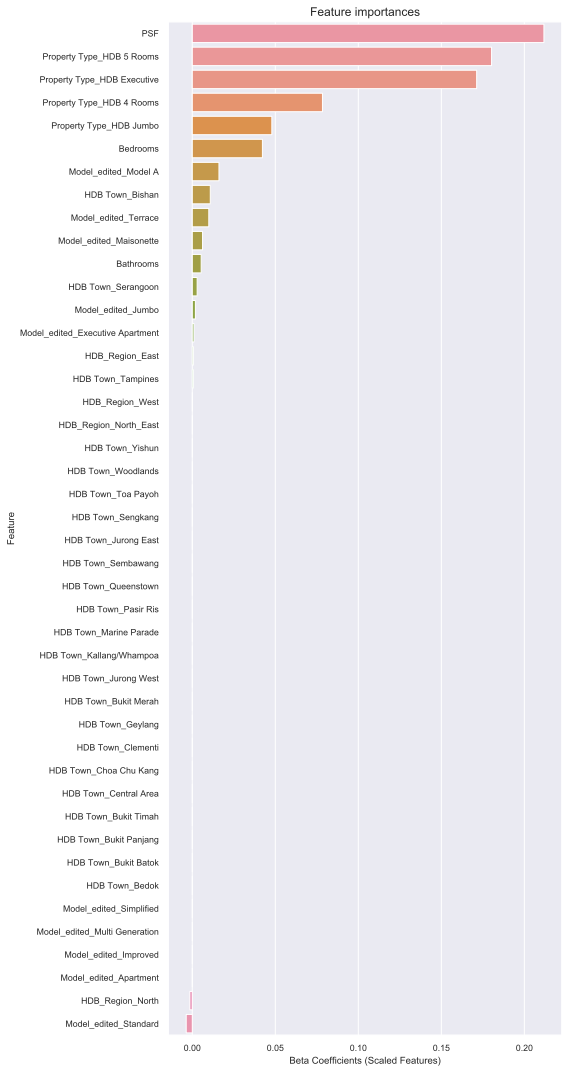

In [41]:
list_of_feature_impt_lasso_1_df = pd.DataFrame(list_of_feature_impt_lasso_1, columns =['Feature', 'Importance']) 
plt.figure(figsize=(8, 15))
sns.set(style = "whitegrid", color_codes=True)
sns.set(font_scale=0.8)
list_of_feature_impt_lasso_1_df.sort_values('Importance',inplace=True, ascending = False)

ax = sns.barplot(x='Importance', y='Feature', data=list_of_feature_impt_lasso_1_df)
ax.set_title("Feature importances", fontsize=12)
ax.set_xlabel("Beta Coefficients (Scaled Features)")
plt.tight_layout()
plt.show();

Computing regularization path using the LARS ...


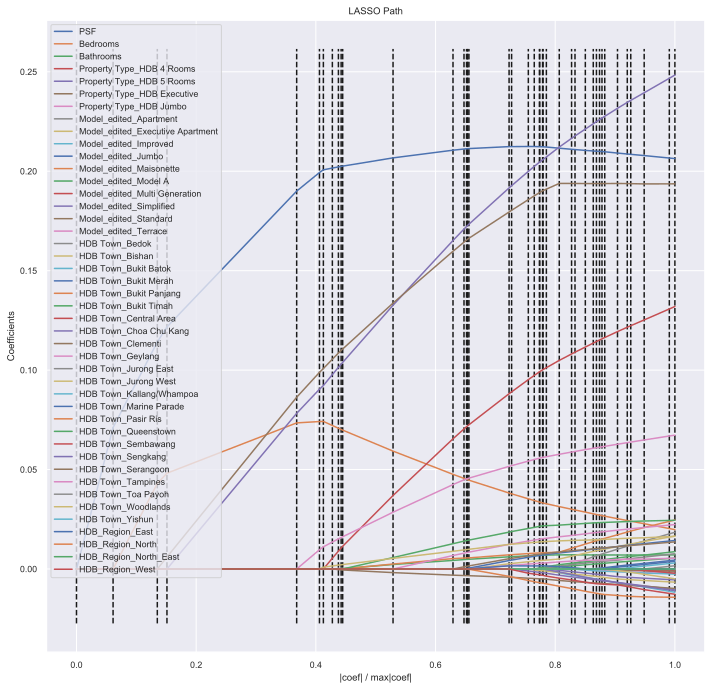

In [139]:
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train_scaled, y_train, method='lasso')
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.tight_layout()
plt.show();

In [74]:
df_2 = df_OLS_evaluated[['PSF', 'Property Type_HDB 4 Rooms', 'Property Type_HDB 5 Rooms',
       'Property Type_HDB Executive', 'Property Type_HDB Jumbo', 'Bedrooms', 
                                                    'Model_edited_Model A', 'HDB Town_Bishan',
                                                    'Model_edited_Terrace', 'Model_edited_Maisonette',
                                                    'Bathrooms', 'HDB Town_Serangoon', 'HDB_Region_North',
                                                    'Model_edited_Standard', 'Asking_log'
                                                   ]]


In [140]:
X_2 = df_2.drop('Asking_log',axis = 1).astype(float)
y_2 = df_2['Asking_log'].astype(float)

#Split the data 60 - 20 - 20 train/val/test

X_train_val_2, X_test_2, y_train_val_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2,random_state=seed)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_val_2, y_train_val_2, test_size=.25, random_state=seed)


In [141]:
# This step fits the Standard Scaler to the training data

std = StandardScaler()
std.fit(X_train_2.values)

# This step applies the scaler to the train set.
X_train_scaled_2 = std.transform(X_train_2.values) 

# This step applies the scaler to the validation set.
X_val_scaled_2 = std.transform(X_val_2.values)

## Apply the scaler to the test set
X_test_scaled_2 = std.transform(X_test_2.values)

# This step fits the Standard Scaler to the train_val data

std = StandardScaler()
std.fit(X_train_val_2.values)

# This step applies the scaler to the train_val set.
X_train_val_scaled_2 = std.transform(X_train_val_2.values) 

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [142]:
# Run the cross validation, find the best alpha for LassoCV
alphavec = 10**np.linspace(-2,2,200)
lasso_model_2 = LassoCV(alphas = alphavec, cv=5)
lasso_model_2.fit(X_train_scaled_2, y_train_2)

# This is the best alpha value it found 
lasso_model_2.alpha_
##lasso regularisation didnt add a significant penalty term to cost function

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

0.01

In [143]:
## Fit a LASSO model on the standardized data

lasso_model_2 = Lasso(lasso_model_2.alpha_)
lasso_model_2.fit(X_train_scaled_2, y_train_2)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
list_of_feature_impt_lasso_2 = sorted(list(zip(X_train_2.columns, lasso_model_2.coef_.round(5))),key=lambda x: x[1], reverse = True)
list_of_feature_impt_lasso_2

[('PSF', 0.21181),
 ('Property Type_HDB 5 Rooms', 0.18025),
 ('Property Type_HDB Executive', 0.17177),
 ('Property Type_HDB 4 Rooms', 0.07844),
 ('Property Type_HDB Jumbo', 0.04898),
 ('Bedrooms', 0.04227),
 ('Model_edited_Model A', 0.0161),
 ('HDB Town_Bishan', 0.01062),
 ('Model_edited_Terrace', 0.00992),
 ('Model_edited_Maisonette', 0.00591),
 ('Bathrooms', 0.00547),
 ('HDB Town_Serangoon', 0.00285),
 ('HDB_Region_North', -0.00145),
 ('Model_edited_Standard', -0.00365)]

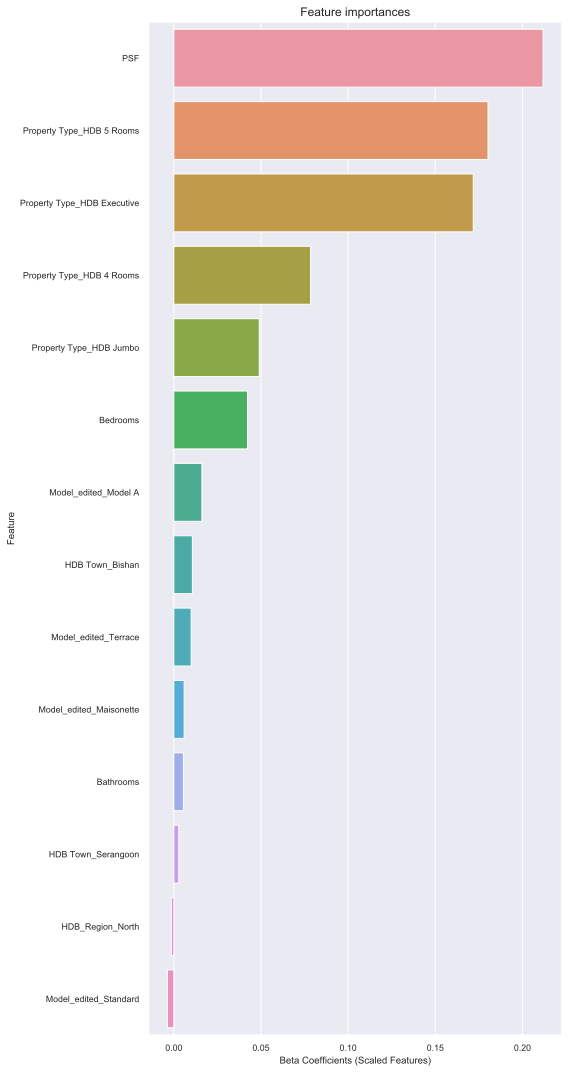

In [80]:
list_of_feature_impt_lasso_2_df = pd.DataFrame(list_of_feature_impt_lasso_2, columns =['Feature', 'Importance']) 
plt.figure(figsize=(8, 15))
sns.set(style = "whitegrid", color_codes=True)
sns.set(font_scale=0.8)
list_of_feature_impt_lasso_2_df.sort_values('Importance',inplace=True, ascending = False)

ax = sns.barplot(x='Importance', y='Feature', data=list_of_feature_impt_lasso_2_df)
ax.set_title("Feature importances", fontsize=12)
ax.set_xlabel("Beta Coefficients (Scaled Features)")
plt.tight_layout()
plt.show();

Computing regularization path using the LARS ...


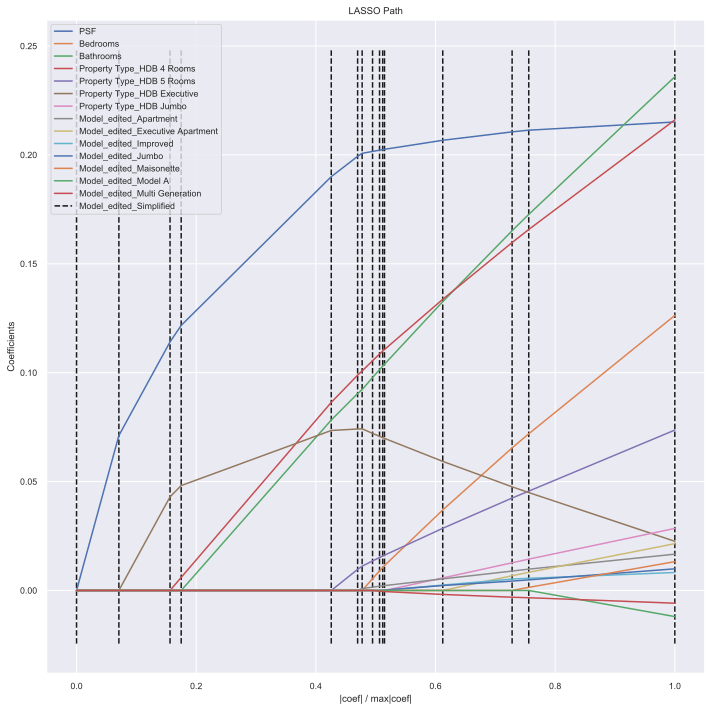

In [144]:
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train_scaled_2, y_train_2, method='lasso')
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.tight_layout()
plt.show();

In [145]:
df_3 = df_selected_features_from_lasso[['PSF', 'Property Type_HDB 4 Rooms', 'Property Type_HDB 5 Rooms',
       'Property Type_HDB Executive', 'Bedrooms', 'Bathrooms', 'Asking_log'
                                                   ]]


In [146]:
X_3 = df_3.drop('Asking_log',axis = 1).astype(float)
y_3 = df_3['Asking_log'].astype(float)

#Split the data 60 - 20 - 20 train/val/test

X_train_val_3, X_test_3, y_train_val_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2,random_state=seed)
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_train_val_3, y_train_val_3, test_size=.25, random_state=seed)


In [147]:
# This step fits the Standard Scaler to the training data

std = StandardScaler()
std.fit(X_train_3.values)

# This step applies the scaler to the train set.
X_train_scaled_3 = std.transform(X_train_3.values) 

# This step applies the scaler to the validation set.
X_val_scaled_3 = std.transform(X_val_3.values)

## Apply the scaler to the test set
X_test_scaled_3 = std.transform(X_test_3.values)

# This step fits the Standard Scaler to the train_val data

std = StandardScaler()
std.fit(X_train_val_3.values)

# This step applies the scaler to the train_val set.
X_train_val_scaled_3 = std.transform(X_train_val_3.values) 

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [148]:
# Run the cross validation, find the best alpha for LassoCV
alphavec = 10**np.linspace(-2,2,200)
lasso_model_3 = LassoCV(alphas = alphavec, cv=5)
lasso_model_3.fit(X_train_scaled_3, y_train_3)

# This is the best alpha value it found 
lasso_model_3.alpha_
##lasso regularisation didnt add a significant penalty term to cost function

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

0.01

In [149]:
## Fit a LASSO model on the standardized data

lasso_model_3 = Lasso(lasso_model_3.alpha_)
lasso_model_3.fit(X_train_scaled_3, y_train_3)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [150]:
list_of_feature_impt_lasso_3 = sorted(list(zip(X_train_3.columns, lasso_model_3.coef_.round(5))),key=lambda x: x[1], reverse = True)
list_of_feature_impt_lasso_3

[('PSF', 0.21627),
 ('Property Type_HDB 5 Rooms', 0.15525),
 ('Property Type_HDB Executive', 0.15234),
 ('Bedrooms', 0.06348),
 ('Property Type_HDB 4 Rooms', 0.06217),
 ('Bathrooms', 0.01361)]

Computing regularization path using the LARS ...


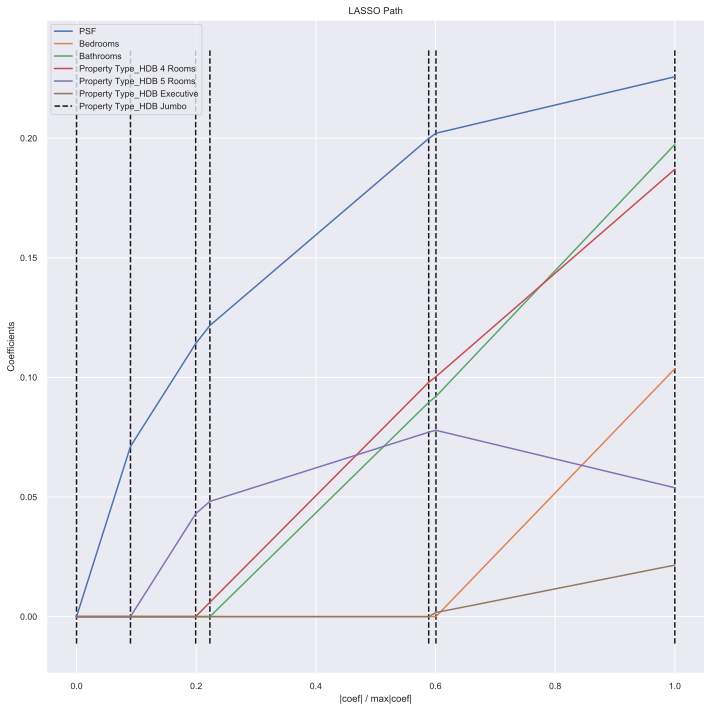

In [151]:
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train_scaled_3, y_train_3, method='lasso')
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.tight_layout()
plt.show();

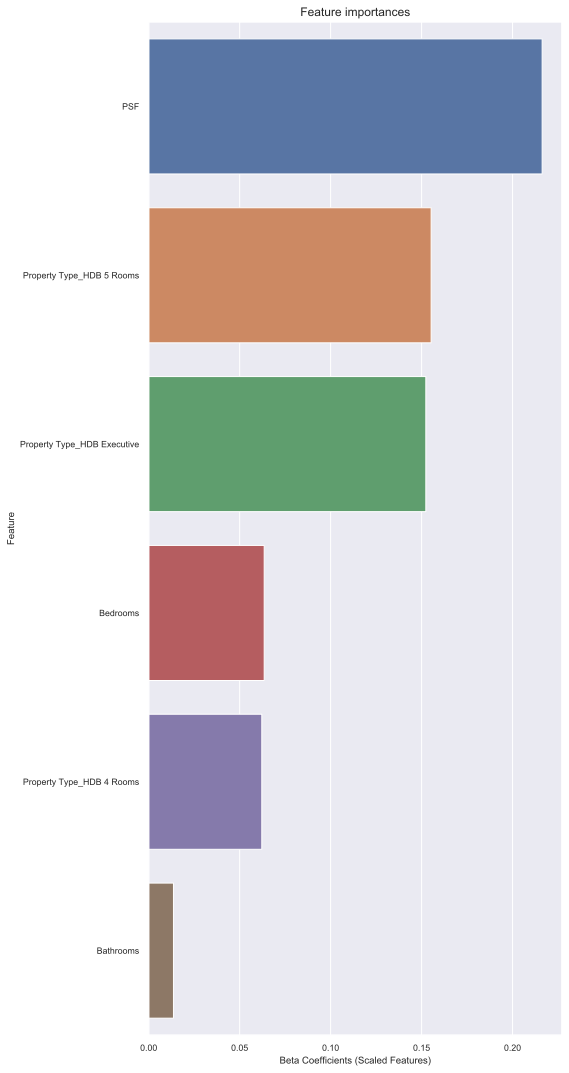

In [152]:
list_of_feature_impt_lasso_3_df = pd.DataFrame(list_of_feature_impt_lasso_3, columns =['Feature', 'Importance']) 
plt.figure(figsize=(8, 15))
sns.set(style = "whitegrid", color_codes=True)
sns.set(font_scale=0.8)
list_of_feature_impt_lasso_3_df.sort_values('Importance',inplace=True, ascending = False)

ax = sns.barplot(x='Importance', y='Feature', data=list_of_feature_impt_lasso_3_df)
ax.set_title("Feature importances", fontsize=12)
ax.set_xlabel("Beta Coefficients (Scaled Features)")
plt.tight_layout()
plt.show();

In [153]:
ols_model_log_price_3 = sm.OLS(y_train, sm.add_constant(X_train_3))
ols_results_log_price_3 = ols_model_log_price_3.fit()

ols_results_log_price_3.summary()

/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asking_log   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     810.5
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          1.81e-307
Time:                        17:11:08   Log-Likelihood:                 505.24
No. Observations:                 693   AIC:                            -996.5
Df Residuals:                     686   BIC:                            -964.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          11.7530      0.027    439.841      0.000      11.701      11.805
PSF                             0.0017   3.41e-05     50.388      0.000       0.002       0.002
Property Type_HDB 4 Rooms       0.2167      0.014     15.764      0.000       0.190       0.244
Property Type_HDB 5 Rooms       0.4178      0.014     29.359      0.000       0.390       0.446
Property Type_HDB Executive     0.5852      0.019     30.057      0.000       0.547       0.623
Bedrooms                        0.0758      0.007     10.120      0.000       0.061       0.091
Bathrooms                       0.0252      0.005      4.781      0.000       0.015       0.036
==============================================================================
Omnibus:                      287.065   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.512
Skew:                           1.659   Prob(JB):                         0.00
Kurtosis:                      11.160   Cond. No.                     3.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
df_5 = df_3[['PSF', 'Property Type_HDB 4 Rooms', 'Property Type_HDB 5 Rooms',
       'Property Type_HDB Executive', 'Property Type_HDB Jumbo', 'Bedrooms', 'Asking_log' ]]

In [90]:
X_5 = df_5.drop('Asking_log',axis = 1).astype(float)
y = df_5['Asking_log'].astype(float)

#Split the data 60 - 20 - 20 train/val/test

X_train_val_5, X_test_5, y_train_val, y_test = train_test_split(X_5, y, test_size=0.2,random_state=seed)
X_train_5, X_val_5, y_train, y_val = train_test_split(X_train_val_5, y_train_val, test_size=.25, random_state=seed)

In [91]:
ols_model_log_price_5 = sm.OLS(y_train, sm.add_constant(X_train_5))
ols_results_log_price_5 = ols_model_log_price_5.fit()

ols_results_log_price_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asking_log   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1187.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:53:27   Log-Likelihood:                 623.63
No. Observations:                 693   AIC:                            -1233.
Df Residuals:                     686   BIC:                            -1201.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          11.8570      0.022    543.438      0.000      11.814      11.900
PSF                             0.0017   2.88e-05     59.600      0.000       0.002       0.002
Property Type_HDB 4 Rooms       0.2885      0.012     23.526      0.000       0.264       0.313
Property Type_HDB 5 Rooms       0.4957      0.013     38.902      0.000       0.471       0.521
Property Type_HDB Executive     0.6927      0.017     40.227      0.000       0.659       0.727
Property Type_HDB Jumbo         0.7297      0.041     17.651      0.000       0.649       0.811
Bedrooms                        0.0318      0.007      4.674      0.000       0.018       0.045
==============================================================================
Omnibus:                      260.483   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3107.789
Skew:                           1.332   Prob(JB):                         0.00
Kurtosis:                      13.026   Cond. No.                     5.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
# This step fits the Standard Scaler to the training data

std = StandardScaler()
std.fit(X_train_5.values)

# This step applies the scaler to the train set.
X_train_scaled_5 = std.transform(X_train_5.values) 

# This step applies the scaler to the validation set.
X_val_scaled_5 = std.transform(X_val_5.values)

## Apply the scaler to the test set
X_test_scaled_5 = std.transform(X_test_5.values)

# This step fits the Standard Scaler to the train_val data

std = StandardScaler()
std.fit(X_train_val_5.values)

# This step applies the scaler to the train_val set.
X_train_val_scaled_5 = std.transform(X_train_val_5.values) 

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
# Run the cross validation, find the best alpha for LassoCV
alphavec = 10**np.linspace(-2,2,200)
lasso_model_5 = LassoCV(alphas = alphavec, cv=5)
lasso_model_5.fit(X_train_scaled_5, y_train)

# This is the best alpha value it found 
lasso_model_5.alpha_
##lasso regularisation didnt add a significant penalty term to cost function

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

0.01

In [94]:

##lasso regularisation didnt add a significant penalty term to cost function
## Fit a LASSO model on the standardized data

lasso_model_5 = Lasso(lasso_model_5.alpha_)
lasso_model_5.fit(X_train_scaled_5, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
list_of_feature_impt_lasso_5 = sorted(list(zip(X_train_5.columns, lasso_model_5.coef_.round(5))),key=lambda x: x[1], reverse = True)
list_of_feature_impt_lasso_5

[('PSF', 0.21583),
 ('Property Type_HDB 5 Rooms', 0.18015),
 ('Property Type_HDB Executive', 0.17546),
 ('Property Type_HDB 4 Rooms', 0.08538),
 ('Property Type_HDB Jumbo', 0.04945),
 ('Bedrooms', 0.04226)]

In [68]:
X_val_5_add_c = sm.add_constant(X_val_5)
val_pred_ols_5 = ols_results_log_price_5.predict(X_val_5_add_c).clip(12.25, 13.96) 

print('OLS model on test data RMSE: {:f}'.format(
    sqrt(mean_squared_error(y_val, val_pred_ols_5))))
print('OLS model on test data MAE: {:f}'.format(
    mean_absolute_error(y_val, val_pred_ols_5)))
print('OLS model on test data RMSE (after reversing log): {:f}'.format(
    sqrt(mean_squared_error(np.exp(y_val), np.exp(val_pred_ols_5)))) )
print('OLS model on test data MSE (after reversing log): {:f}'.format(
    mean_absolute_error(np.exp(y_val), np.exp(val_pred_ols_5)))) 

OLS model on test data RMSE: 0.076713
OLS model on test data MAE: 0.057692
OLS model on test data RMSE (after reversing log): 42690.810608
OLS model on test data MSE (afte reversing log): 29381.775318


In [69]:
ols_model_log_price_5_full = sm.OLS(y_train_val, sm.add_constant(X_train_val_5))
ols_results_log_price_5_full = ols_model_log_price_5_full.fit()
ols_results_log_price_5_full.summary()

/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asking_log   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1762.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:47:50   Log-Likelihood:                 880.60
No. Observations:                 924   AIC:                            -1747.
Df Residuals:                     917   BIC:                            -1713.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          11.8478      0.018    646.963      0.000      11.812      11.884
PSF                             0.0017   2.39e-05     71.655      0.000       0.002       0.002
Property Type_HDB 4 Rooms       0.2997      0.010     29.551      0.000       0.280       0.320
Property Type_HDB 5 Rooms       0.5083      0.011     47.493      0.000       0.487       0.529
Property Type_HDB Executive     0.7024      0.015     47.641      0.000       0.674       0.731
Property Type_HDB Jumbo         0.7633      0.035     21.946      0.000       0.695       0.832
Bedrooms                        0.0314      0.006      5.314      0.000       0.020       0.043
==============================================================================
Omnibus:                      327.213   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4161.519
Skew:                           1.243   Prob(JB):                         0.00
Kurtosis:                      13.095   Cond. No.                     5.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
X_test_5_add_c = sm.add_constant(X_test_5)
test_pred_ols_5 = ols_results_log_price_5_full.predict(X_test_5_add_c).clip(12.25, 13.96) 
print('OLS model on test data RMSE: {:f}'.format(
    sqrt(mean_squared_error(y_test, test_pred_ols_5))))
print('OLS model on test data MAE: {:f}'.format(
    mean_absolute_error(y_test, test_pred_ols_5)))
print('OLS model on test data RMSE (after reversing log): {:f}'.format(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(test_pred_ols_5)))) )
print('OLS model on test data MSE (afte reversing log): {:f}'.format(
    mean_absolute_error(np.exp(y_test), np.exp(test_pred_ols_5)))) 

OLS model on test data RMSE: 0.113938
OLS model on test data MAE: 0.065480
OLS model on test data RMSE (after reversing log): 58103.196558
OLS model on test data MSE (afte reversing log): 33882.916075


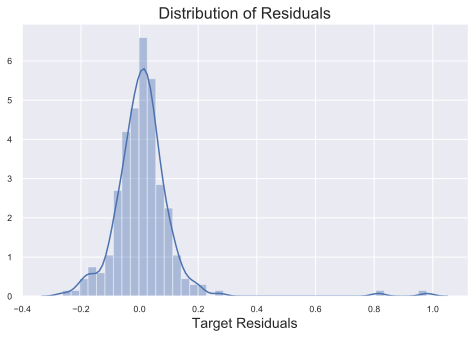

In [72]:
ols_test_residual_5 = y_test - test_pred_ols_5
# Plot distribution of residuals
plt.figure(figsize=(8, 5))
sns.distplot(ols_test_residual_5)
plt.xlabel('Target Residuals', size=14)
sns.despine()
plt.title('Distribution of Residuals', size=16)
# plt.savefig('../reports/figures/residual_distribution_appendix.png')
plt.show();

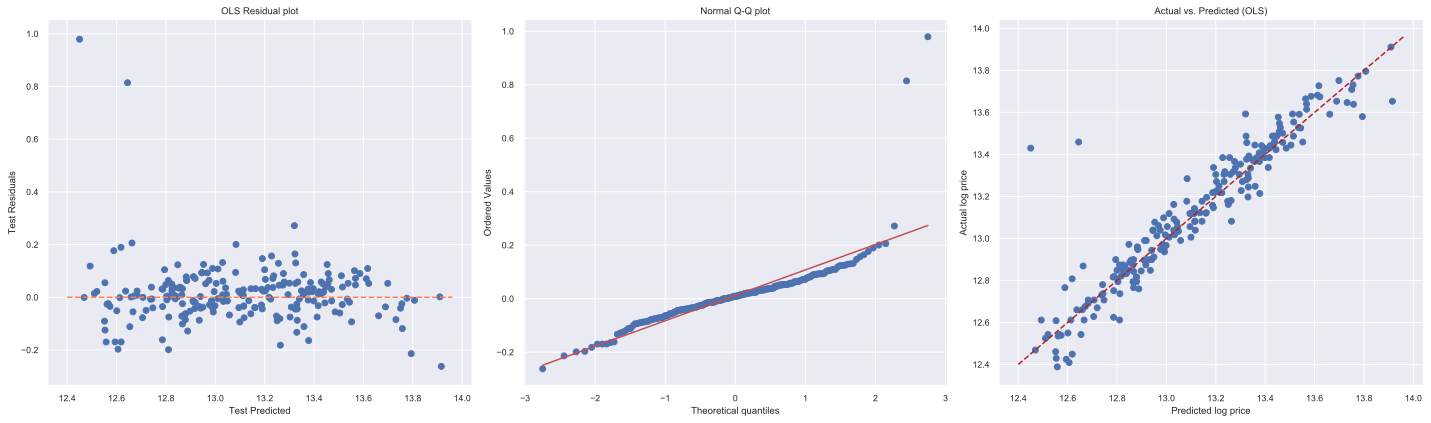

In [73]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.scatter(test_pred_ols_5, ols_test_residual_5)
sns.despine()
plt.plot([12.4, 13.96], [0, 0], '--', color='coral')
plt.title("OLS Residual plot")
plt.xlabel("Test Predicted")
plt.ylabel("Test Residuals")

plt.subplot(1, 3, 2)
stats.probplot(ols_test_residual_5, dist="norm", plot=plt)
sns.despine()
plt.title("Normal Q-Q plot")

plt.subplot(1, 3, 3)
plt.scatter(test_pred_ols_5, y_test)
sns.despine()
plt.plot([12.4, 13.96], [12.4, 13.96], '--', c='firebrick')
plt.xlabel("Predicted log price")
plt.ylabel("Actual log price")
plt.title("Actual vs. Predicted (OLS)")
plt.tight_layout()
# plt.savefig('../reports/figures/selected_features_diagnostic_plot_test_set_ols.png', dpi=600)
plt.show();

In [165]:
df_6 = df_5[['PSF', 'Property Type_HDB 5 Rooms', 
       'Property Type_HDB Executive', 'Property Type_HDB Jumbo', 'Bedrooms', 'Asking_log' ]]
X_6 = df_6.drop('Asking_log',axis = 1).astype(float)
y_6 = df_6['Asking_log'].astype(float)

#Split the data 60 - 20 - 20 train/val/test

X_train_val_6, X_test_6, y_train_val_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.2,random_state=seed)
X_train_6, X_val_6, y_train_6, y_val_6 = train_test_split(X_train_val_6, y_train_val_6, test_size=.25, random_state=seed)


In [166]:
# This step fits the Standard Scaler to the training data

std = StandardScaler()
std.fit(X_train_6.values)

# This step applies the scaler to the train set.
X_train_scaled_6 = std.transform(X_train_6.values) 

# This step applies the scaler to the validation set.
X_val_scaled_6 = std.transform(X_val_6.values)

## Apply the scaler to the test set
X_test_scaled_6 = std.transform(X_test_6.values)

# This step fits the Standard Scaler to the train_val data

std = StandardScaler()
std.fit(X_train_val_6.values)

# This step applies the scaler to the train_val set.
X_train_val_scaled_6 = std.transform(X_train_val_6.values) 

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [167]:
# Run the cross validation, find the best alpha for LassoCV
alphavec = 10**np.linspace(-2,2,200)
lasso_model_6 = LassoCV(alphas = alphavec, cv=5)
lasso_model_6.fit(X_train_scaled_6, y_train_6)

# This is the best alpha value it found 
lasso_model_6.alpha_
##lasso regularisation didnt add a significant penalty term to cost function

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

0.01

In [168]:
## Fit a LASSO model on the standardized data

lasso_model_6 = Lasso(lasso_model_6.alpha_)
lasso_model_6.fit(X_train_scaled_6, y_train_6)
list_of_feature_impt_lasso_6 = sorted(list(zip(X_train_6.columns, lasso_model_6.coef_.round(5))),key=lambda x: x[1], reverse = True)
list_of_feature_impt_lasso_6

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[('PSF', 0.21875),
 ('Property Type_HDB Executive', 0.12487),
 ('Property Type_HDB 5 Rooms', 0.1156),
 ('Bedrooms', 0.07554),
 ('Property Type_HDB Jumbo', 0.02979)]

In [182]:
lasso_val_pred_6 = lasso_model_6.predict(X_val_scaled_6).clip(12.25, 13.96) 
lasso_residual_6 = y_val_6 - lasso_val_pred_6

lasso_val_r_squared = lasso_model_6.score(X_val_scaled_6, y_val_6)
lasso_val_adjusted_r_squared = 1 - (1-lasso_val_r_squared)*(len(y_val)-1)/(len(y_val)-X_val_scaled_6.shape[1]-1)
print(f'lasso Regression Test Adjusted R^2: {lasso_val_adjusted_r_squared:.3f}')

print('Lasso model on validation data RMSE: {:f}'.format(
    sqrt(mean_squared_error(y_val_6, lasso_val_pred_6))))
print('Lasso model on validation data MAE: {:f}'.format(
    mean_absolute_error(y_val_6, lasso_val_pred_6)))
print('Lasso model on validation data RMSE (after reversing log): {:f}'.format(
    sqrt(mean_squared_error(np.exp(y_val_6), np.exp(lasso_val_pred_6)))) )
print('Lasso model on validation data MSE (after reversing log): {:f}'.format(
    mean_absolute_error(np.exp(y_val_6), np.exp(lasso_val_pred_6)))) 

lasso Regression Test Adjusted R^2: 0.843
Lasso model on validation data RMSE: 0.126041
Lasso model on validation data MAE: 0.099042
Lasso model on validation data RMSE (after reversing log): 60159.304270
Lasso model on validation data MSE (after reversing log): 46591.153548


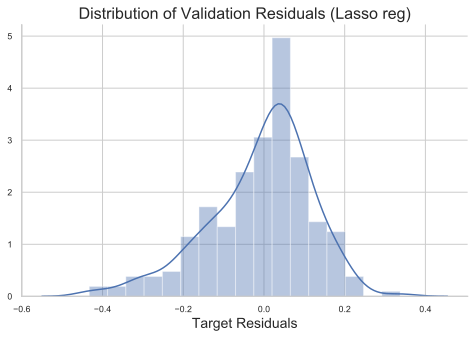

In [124]:
# Plot distribution of residuals
plt.figure(figsize=(8, 5))
sns.distplot(lasso_residual_6)
plt.xlabel('Target Residuals', size=14)
sns.despine()
plt.title('Distribution of Validation Residuals (Lasso reg)', size=16)
# plt.savefig('../reports/figures/residual_distribution_appendix.png')
plt.show();

In [175]:
#fit lasso model on 80% of train data
lasso_model_6.fit(X_train_val_scaled_6, y_train_val)
list_of_feature_impt_lasso_full_6 = sorted(list(zip(X_train_val_6.columns, lasso_model_6.coef_.round(5))),key=lambda x: x[1], reverse = True)
list_of_feature_impt_lasso_full_6

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[('PSF', 0.21229),
 ('Property Type_HDB Executive', 0.11768),
 ('Property Type_HDB 5 Rooms', 0.11414),
 ('Bedrooms', 0.08383),
 ('Property Type_HDB Jumbo', 0.02909)]

In [179]:
#fit lasso model on 80% of train data
lasso_model_6.fit(X_train_val_scaled_6, y_train_val)
list_of_feature_impt_lasso_full_6 = sorted(list(zip(X_train_val_6.columns, lasso_model_6.coef_.round(5))),key=lambda x: x[1], reverse = True)
list_of_feature_impt_lasso_full_6

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[('PSF', 0.21229),
 ('Property Type_HDB Executive', 0.11768),
 ('Property Type_HDB 5 Rooms', 0.11414),
 ('Bedrooms', 0.08383),
 ('Property Type_HDB Jumbo', 0.02909)]

In [170]:
lasso_model_6.intercept_

13.123397805739618

In [180]:
for coefficient in lasso_model_6.coef_.round(5):
    np.exp(lasso_model_6.intercept_+ coefficient)

610188.8614103883

553144.0844447336

555105.6844872442

508044.23375973065

536629.8251246541

In [181]:
np.exp(lasso_model_6.intercept_+ 0.11414)
np.exp(lasso_model_6.intercept_+ 0.08383)
np.exp(lasso_model_6.intercept_+ 0.02909)

553144.0844447336

536629.8251246541

508044.23375973065

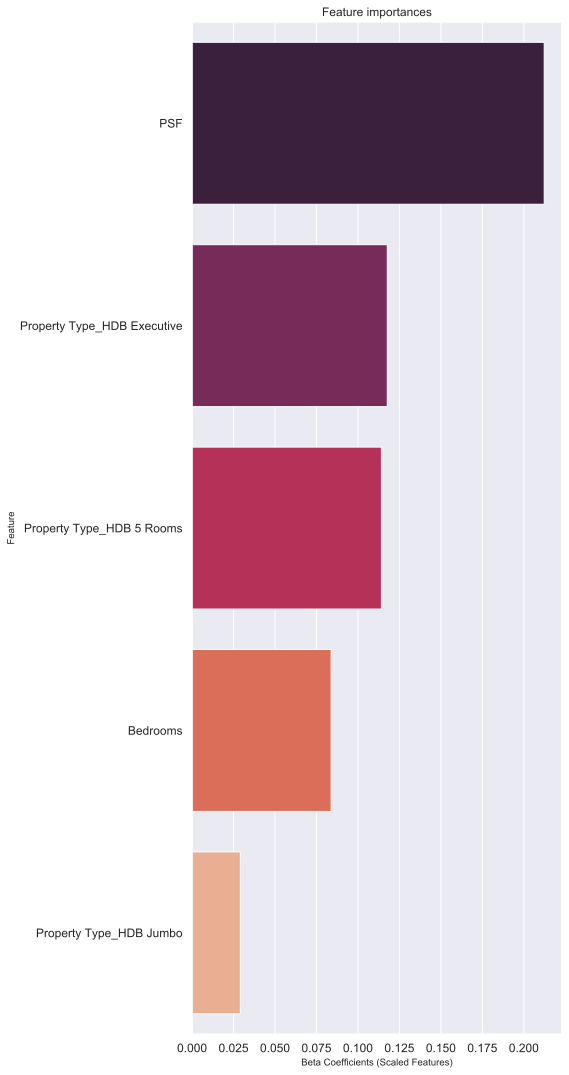

In [163]:
list_of_feature_impt_lasso_full_6_df = pd.DataFrame(list_of_feature_impt_lasso_full_6, columns =['Feature', 'Importance']) 
plt.figure(figsize=(8, 15))
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set(font_scale=0.8)
list_of_feature_impt_lasso_full_6_df.sort_values('Importance',inplace=True, ascending = False)

ax = sns.barplot(x='Importance', y='Feature', data=list_of_feature_impt_lasso_full_6_df, palette="rocket")
ax.set_title("Feature importances", fontsize=12)
ax.set_xlabel("Beta Coefficients (Scaled Features)")
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig('../reports/figures/selected_features_diagnostic_plot_test_set_lasso.png', dpi=600)
plt.show();

In [183]:
#predict on test set
lasso_test_pred_6 = lasso_model_6.predict(X_test_scaled_6).clip(12.25, 13.96) 
lasso_test_residual_6 = y_test_6 - lasso_test_pred_6

lasso_test_r_squared = lasso_model_6.score(X_test_scaled_6, y_test_6)
lasso_test_adjusted_r_squared = 1 - (1-lasso_test_r_squared)*(len(y_test_6)-1)/(len(y_val)-X_test_scaled_6.shape[1]-1)
print(f'lasso Regression Test Adjusted R^2: {lasso_test_adjusted_r_squared:.3f}')

print('Lasso model on test data RMSE: {:f}'.format(
    sqrt(mean_squared_error(y_test, lasso_test_pred_6))))
print('Lasso model on test data MAE: {:f}'.format(
    mean_absolute_error(y_test, lasso_test_pred_6)))
print('Lasso model on test data RMSE (after reversing log): {:f}'.format(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(lasso_test_pred_6)))) )
print('Lasso model on test data MAE (after reversing log): {:f}'.format(
    mean_absolute_error(np.exp(y_test), np.exp(lasso_test_pred_6)))) 

lasso Regression Test Adjusted R^2: 0.773
Lasso model on test data RMSE: 0.157535
Lasso model on test data MAE: 0.108837
Lasso model on test data RMSE (after reversing log): 74416.748057
Lasso model on test data MAE (after reversing log): 52549.767716


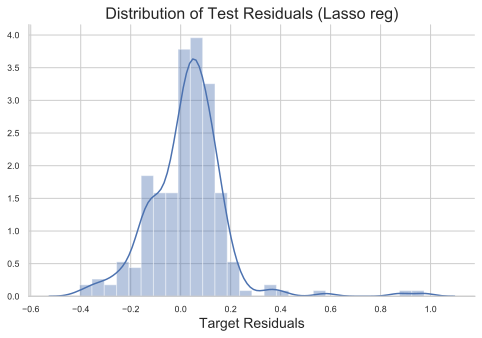

In [133]:
# Plot distribution of residuals
plt.figure(figsize=(8, 5))
sns.distplot(lasso_test_residual_6)
plt.xlabel('Target Residuals', size=14)
sns.despine()
plt.title('Distribution of Test Residuals (Lasso reg)', size=16)
plt.savefig('../reports/figures/lasso_test_residual_distribution_appendix.png')
plt.show();

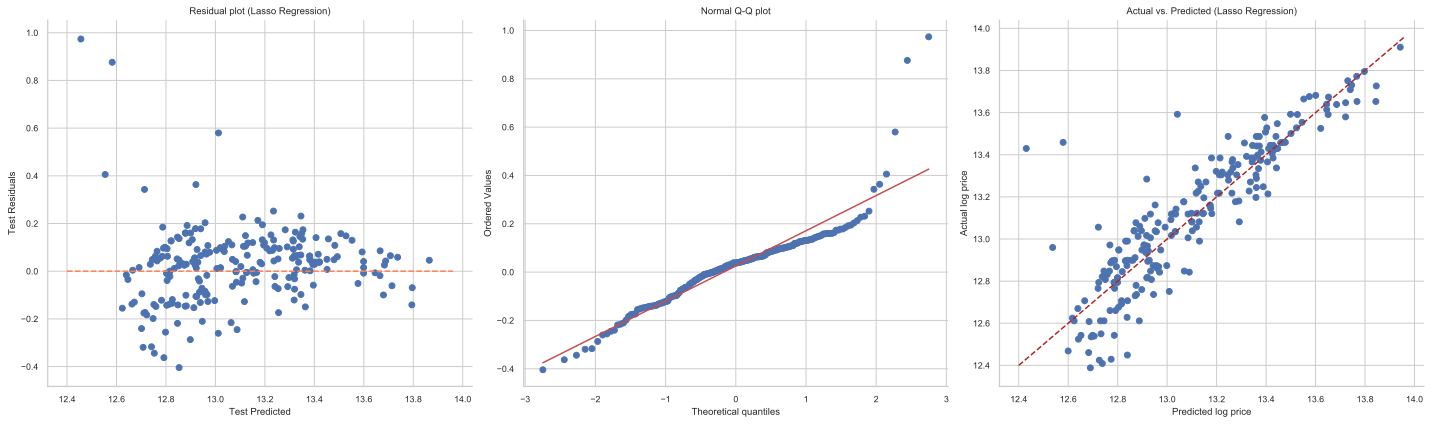

In [155]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.scatter(lasso_test_pred_6, lasso_test_residual_6)
sns.despine()
plt.plot([12.4, 13.96], [0, 0], '--', color='coral')
plt.title("Residual plot (Lasso Regression)")
plt.xlabel("Test Predicted")
plt.ylabel("Test Residuals")

plt.subplot(1, 3, 2)
stats.probplot(lasso_test_residual_6, dist="norm", plot=plt)
sns.despine()
plt.title("Normal Q-Q plot")

plt.subplot(1, 3, 3)
plt.scatter(test_pred_ols_6, y_test)
sns.despine()
plt.plot([12.4, 13.96], [12.4, 13.96], '--', c='firebrick')
plt.xlabel("Predicted log price")
plt.ylabel("Actual log price")
plt.title("Actual vs. Predicted (Lasso Regression)")
plt.tight_layout()
plt.savefig('../reports/figures/selected_features_diagnostic_plot_test_set_lasso.png', dpi=600)
plt.show();

In [131]:
#inspect extreme residuals
test_flats_with_large_residuals_6 = lasso_test_residual_6[(lasso_test_residual_6 >0.2) | (lasso_test_residual_6 < -0.2)].index
# flats_with_extreme_prices
df_6.iloc[test_flats_with_large_residuals_6]
selected_flats_model_df_pre_dummy.iloc[test_flats_with_large_residuals_6]


,PSF,Property Type_HDB 5 Rooms,Property Type_HDB Executive,Property Type_HDB Jumbo,Bedrooms,Asking_log
250,399.00,0,0,0,2,12.42
97,357.00,0,0,0,3,12.43
499,460.00,0,0,0,3,13.16
543,554.00,0,0,0,3,13.34
204,598.00,0,0,0,2,12.85
1036,497.00,1,0,0,3,13.30
103,563.00,1,0,0,0,13.59
998,510.00,0,1,0,4,13.58
417,631.00,0,0,0,3,13.49
156,395.00,0,0,0,3,12.45


,Property Type,PSF,Built Year,HDB Town,Bedrooms,Bathrooms,Land Tenure,Corner Unit,Renovated,Air Conditioning,Water Heater,Cooker Hob/hood,Balcony,Original Condition,Hairdryer,City View,Bombshelter,Park/greenery View,Walk-in-wardrobe,Maidsroom,Intercom,Sea View,Colonial Building,Bathtub,Private Garden,Outdoor Patio,Private Lift,Roof Terrace,Swimming Pool View,Model_edited,Indicated_year_built,Age,HDB_Region,Asking_log
250,HDB 3 Rooms,399.00,1972,Geylang,2,2,LEASEHOLD/99 years,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,Improved,1,48.00,Central,12.42
97,HDB 3 Rooms,357.00,1967,Toa Payoh,3,0,LEASEHOLD/99 years,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,53.00,Central,12.43
499,HDB 4 Rooms,460.00,1992,Bishan,3,2,LEASEHOLD/99 years,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,28.00,Central,13.16
543,HDB 4 Rooms,554.00,1992,Bishan,3,0,LEASEHOLD/99 years,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Model A,1,28.00,Central,13.34
204,HDB 3 Rooms,598.00,1974,Queenstown,2,0,LEASEHOLD/99 years,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Improved,1,46.00,Central,12.85
1036,HDB 5 Rooms,497.00,2015,Punggol,3,2,LEASEHOLD/99 years,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Improved,1,5.00,North_East,13.30
103,HDB 5 Rooms,563.00,1992,Bishan,0,4,LEASEHOLD/99 years,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,Model A,1,28.00,Central,13.59
998,HDB Executive,510.00,1998,Jurong East,4,2,LEASEHOLD/99 years,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Apartment,1,22.00,West,13.58
417,HDB 4 Rooms,631.00,1984,Geylang,3,2,LEASEHOLD/99 years,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Model A,1,36.00,Central,13.49
156,HDB 3 Rooms,395.00,1967,Geylang,3,1,LEASEHOLD/99 years,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Standard,1,53.00,Central,12.45


In [103]:
ols_model_log_price_6 = sm.OLS(y_train, sm.add_constant(X_train_6))
ols_results_log_price_6 = ols_model_log_price_6.fit()

ols_results_log_price_6.summary()


/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asking_log   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     728.2
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          9.90e-272
Time:                        16:01:26   Log-Likelihood:                 418.65
No. Observations:                 693   AIC:                            -825.3
Df Residuals:                     687   BIC:                            -798.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          11.8226      0.029    404.319      0.000      11.765      11.880
PSF                             0.0018   3.86e-05     45.363      0.000       0.002       0.002
Property Type_HDB 5 Rooms       0.2750      0.012     23.743      0.000       0.252       0.298
Property Type_HDB Executive     0.4369      0.018     24.359      0.000       0.402       0.472
Property Type_HDB Jumbo         0.4121      0.052      7.852      0.000       0.309       0.515
Bedrooms                        0.1074      0.008     13.353      0.000       0.092       0.123
==============================================================================
Omnibus:                       22.068   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.873
Skew:                          -0.151   Prob(JB):                     1.80e-10
Kurtosis:                       4.210   Cond. No.                     5.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
X_val_6_add_c = sm.add_constant(X_val_6)
val_pred_ols_6 = ols_results_log_price_6.predict(X_val_6_add_c).clip(12.25, 13.96) 

print('OLS model on validation data RMSE: {:f}'.format(
    sqrt(mean_squared_error(y_val, val_pred_ols_6))))
print('OLS model on validation data MAE: {:f}'.format(
    mean_absolute_error(y_val, val_pred_ols_6)))
print('OLS model on validation data RMSE (after reversing log): {:f}'.format(
    sqrt(mean_squared_error(np.exp(y_val), np.exp(val_pred_ols_6)))) )
print('OLS model on validation data MSE (after reversing log): {:f}'.format(
    mean_absolute_error(np.exp(y_val), np.exp(val_pred_ols_6)))) 

OLS model on validation data RMSE: 0.125785
OLS model on validation data MAE: 0.098384
OLS model on validation data RMSE (after reversing log): 61031.384064
OLS model on validation data MSE (after reversing log): 45816.655114


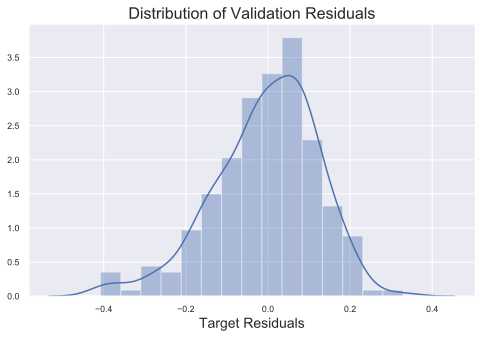

In [106]:
ols_val_residual_6 = y_val - val_pred_ols_6
# Plot distribution of residuals
plt.figure(figsize=(8, 5))
sns.distplot(ols_val_residual_6)
plt.xlabel('Target Residuals', size=14)
sns.despine()
plt.title('Distribution of Validation Residuals', size=16)
# plt.savefig('../reports/figures/residual_distribution_appendix.png')
plt.show();

In [107]:
ols_model_log_price_6_full = sm.OLS(y_train_val, sm.add_constant(X_train_val_6))
ols_results_log_price_6_full = ols_model_log_price_6_full.fit()
ols_results_log_price_6_full.summary()

/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asking_log   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     994.9
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:03:56   Log-Likelihood:                 571.52
No. Observations:                 924   AIC:                            -1131.
Df Residuals:                     918   BIC:                            -1102.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          11.7964      0.025    463.366      0.000      11.746      11.846
PSF                             0.0017   3.34e-05     51.719      0.000       0.002       0.002
Property Type_HDB 5 Rooms       0.2730      0.010     27.337      0.000       0.253       0.293
Property Type_HDB Executive     0.4220      0.016     26.779      0.000       0.391       0.453
Property Type_HDB Jumbo         0.4135      0.046      9.054      0.000       0.324       0.503
Bedrooms                        0.1203      0.007     16.928      0.000       0.106       0.134
==============================================================================
Omnibus:                       30.609   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.082
Skew:                          -0.129   Prob(JB):                     9.98e-16
Kurtosis:                       4.315   Cond. No.                     5.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
X_test_6_add_c = sm.add_constant(X_test_6)
test_pred_ols_6 = ols_results_log_price_6_full.predict(X_test_6_add_c).clip(12.25, 13.96) 
print('OLS model on test data RMSE: {:f}'.format(
    sqrt(mean_squared_error(y_test, test_pred_ols_6))))
print('OLS model on test data MAE: {:f}'.format(
    mean_absolute_error(y_test, test_pred_ols_6)))
print('OLS model on test data RMSE (after reversing log): {:f}'.format(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(test_pred_ols_6)))) )
print('OLS model on test data MSE (afte reversing log): {:f}'.format(
    mean_absolute_error(np.exp(y_test), np.exp(test_pred_ols_6)))) 

OLS model on test data RMSE: 0.155207
OLS model on test data MAE: 0.105195
OLS model on test data RMSE (after reversing log): 72632.637469
OLS model on test data MSE (afte reversing log): 50081.144622


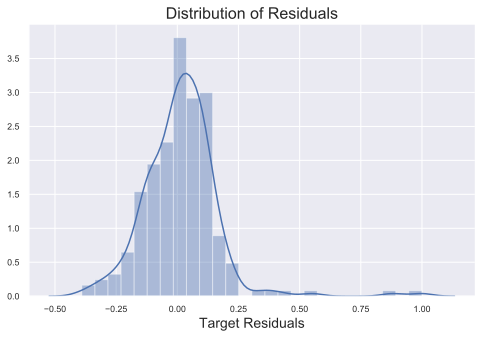

In [110]:
ols_test_residual_6 = y_test - test_pred_ols_6
# Plot distribution of residuals
plt.figure(figsize=(8, 5))
sns.distplot(ols_test_residual_6)
plt.xlabel('Target Residuals', size=14)
sns.despine()
plt.title('Distribution of Residuals', size=16)
plt.savefig('../reports/figures/residual_distribution_appendix.png')
plt.show();

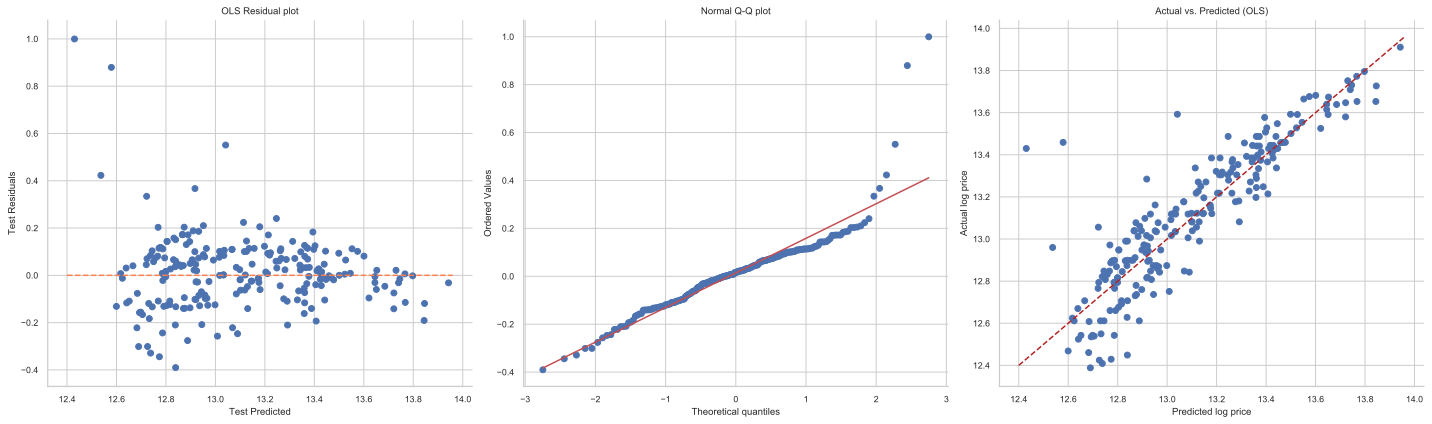

In [111]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.scatter(test_pred_ols_6, ols_test_residual_6)
sns.despine()
plt.plot([12.4, 13.96], [0, 0], '--', color='coral')
plt.title("OLS Residual plot")
plt.xlabel("Test Predicted")
plt.ylabel("Test Residuals")

plt.subplot(1, 3, 2)
stats.probplot(ols_test_residual_6, dist="norm", plot=plt)
sns.despine()
plt.title("Normal Q-Q plot")

plt.subplot(1, 3, 3)
plt.scatter(test_pred_ols_6, y_test)
sns.despine()
plt.plot([12.4, 13.96], [12.4, 13.96], '--', c='firebrick')
plt.xlabel("Predicted log price")
plt.ylabel("Actual log price")
plt.title("Actual vs. Predicted (OLS)")
plt.tight_layout()
plt.savefig('../reports/figures/selected_features_diagnostic_plot_test_set_ols.png', dpi=600)
plt.show();

In [112]:
#inspect extreme residuals
test_flats_with_large_residuals = ols_test_residual_6[(ols_test_residual_6 >0.2) | (ols_test_residual_6 < -0.2)].index
# flats_with_extreme_prices
df_6.iloc[test_flats_with_large_residuals]
selected_flats_model_df_pre_dummy.iloc[test_flats_with_large_residuals]


,PSF,Property Type_HDB 5 Rooms,Property Type_HDB Executive,Property Type_HDB Jumbo,Bedrooms,Asking_log
250,399.00,0,0,0,2,12.42
97,357.00,0,0,0,3,12.43
499,460.00,0,0,0,3,13.16
543,554.00,0,0,0,3,13.34
204,598.00,0,0,0,2,12.85
1036,497.00,1,0,0,3,13.30
42,415.00,0,0,0,3,13.08
103,563.00,1,0,0,0,13.59
998,510.00,0,1,0,4,13.58
417,631.00,0,0,0,3,13.49


,Property Type,PSF,Built Year,HDB Town,Bedrooms,Bathrooms,Land Tenure,Corner Unit,Renovated,Air Conditioning,Water Heater,Cooker Hob/hood,Balcony,Original Condition,Hairdryer,City View,Bombshelter,Park/greenery View,Walk-in-wardrobe,Maidsroom,Intercom,Sea View,Colonial Building,Bathtub,Private Garden,Outdoor Patio,Private Lift,Roof Terrace,Swimming Pool View,Model_edited,Indicated_year_built,Age,HDB_Region,Asking_log
250,HDB 3 Rooms,399.00,1972,Geylang,2,2,LEASEHOLD/99 years,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,Improved,1,48.00,Central,12.42
97,HDB 3 Rooms,357.00,1967,Toa Payoh,3,0,LEASEHOLD/99 years,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,53.00,Central,12.43
499,HDB 4 Rooms,460.00,1992,Bishan,3,2,LEASEHOLD/99 years,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,28.00,Central,13.16
543,HDB 4 Rooms,554.00,1992,Bishan,3,0,LEASEHOLD/99 years,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Model A,1,28.00,Central,13.34
204,HDB 3 Rooms,598.00,1974,Queenstown,2,0,LEASEHOLD/99 years,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Improved,1,46.00,Central,12.85
1036,HDB 5 Rooms,497.00,2015,Punggol,3,2,LEASEHOLD/99 years,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Improved,1,5.00,North_East,13.30
42,HDB 4 Rooms,415.00,1995,Tampines,3,2,LEASEHOLD/99 years,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Model A,1,25.00,East,13.08
103,HDB 5 Rooms,563.00,1992,Bishan,0,4,LEASEHOLD/99 years,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,Model A,1,28.00,Central,13.59
998,HDB Executive,510.00,1998,Jurong East,4,2,LEASEHOLD/99 years,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Apartment,1,22.00,West,13.58
417,HDB 4 Rooms,631.00,1984,Geylang,3,2,LEASEHOLD/99 years,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Model A,1,36.00,Central,13.49


In [118]:
list_of_feature_impt_test_ols_6 = sorted(list(zip(X_train_val_6.columns, ols_results_log_price_6_full.params.iloc[1:].round(2))),key=lambda x: x[1], reverse = True)
list_of_feature_impt_test_ols_6

[('Property Type_HDB Executive', 0.42),
 ('Property Type_HDB Jumbo', 0.41),
 ('Property Type_HDB 5 Rooms', 0.27),
 ('Bedrooms', 0.12),
 ('PSF', 0.0)]

In [ ]:

list_of_feature_impt_test_ols_6_df = pd.DataFrame(list_of_feature_impt_test_ols_6, columns =['Feature', 'Importance']) 
plt.figure(figsize=(8, 15))
sns.set(style = "whitegrid", color_codes=True)
sns.set(font_scale=0.8)
list_of_feature_impt_test_ols_6_df.sort_values('Importance',inplace=True, ascending = False)

ax = sns.barplot(x='Importance', y='Feature', data=list_of_feature_impt_test_ols_6_df)
ax.set_title("Feature importances", fontsize=12)
ax.set_xlabel("Beta Coefficients")
plt.tight_layout()
plt.show();

In [117]:
extreme_residuals = selected_flats_model_df_pre_dummy.iloc[test_flats_with_large_residuals]
extreme_residuals_set = set(extreme_residuals)
# premium_set = set(extreme_residuals.loc[extreme_residuals['Corner Unit']==1]) + set(extreme_residuals.loc[extreme_residuals['Renovated']==1]) + set(extreme_residuals.loc[extreme_residuals['HDB_Region']=='Central'])
# extreme_residuals_set.difference(premium_set)
extreme_residuals_set
extreme_residuals.head(3)

{'Age',
 'Air Conditioning',
 'Asking_log',
 'Balcony',
 'Bathrooms',
 'Bathtub',
 'Bedrooms',
 'Bombshelter',
 'Built Year',
 'City View',
 'Colonial Building',
 'Cooker Hob/hood',
 'Corner Unit',
 'HDB Town',
 'HDB_Region',
 'Hairdryer',
 'Indicated_year_built',
 'Intercom',
 'Land Tenure',
 'Maidsroom',
 'Model_edited',
 'Original Condition',
 'Outdoor Patio',
 'PSF',
 'Park/greenery View',
 'Private Garden',
 'Private Lift',
 'Property Type',
 'Renovated',
 'Roof Terrace',
 'Sea View',
 'Swimming Pool View',
 'Walk-in-wardrobe',
 'Water Heater'}

,Property Type,PSF,Built Year,HDB Town,Bedrooms,Bathrooms,Land Tenure,Corner Unit,Renovated,Air Conditioning,Water Heater,Cooker Hob/hood,Balcony,Original Condition,Hairdryer,City View,Bombshelter,Park/greenery View,Walk-in-wardrobe,Maidsroom,Intercom,Sea View,Colonial Building,Bathtub,Private Garden,Outdoor Patio,Private Lift,Roof Terrace,Swimming Pool View,Model_edited,Indicated_year_built,Age,HDB_Region,Asking_log
250,HDB 3 Rooms,399.00,1972,Geylang,2,2,LEASEHOLD/99 years,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,Improved,1,48.00,Central,12.42
97,HDB 3 Rooms,357.00,1967,Toa Payoh,3,0,LEASEHOLD/99 years,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,53.00,Central,12.43
499,HDB 4 Rooms,460.00,1992,Bishan,3,2,LEASEHOLD/99 years,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,28.00,Central,13.16


In [119]:
df_7 = df_5[['PSF', 'Property Type_HDB 5 Rooms','Property Type_HDB 4 Rooms',
       'Property Type_HDB Executive', 'Property Type_HDB Jumbo', 'Asking_log' ]]
X_7 = df_7.drop('Asking_log',axis = 1).astype(float)
y = df_7['Asking_log'].astype(float)

#Split the data 60 - 20 - 20 train/val/test

X_train_val_7, X_test_7, y_train_val, y_test = train_test_split(X_7, y, test_size=0.2,random_state=seed)
X_train_7, X_val_7, y_train, y_val = train_test_split(X_train_val_7, y_train_val, test_size=.25, random_state=seed)

ols_model_log_price_7 = sm.OLS(y_train, sm.add_constant(X_train_7))
ols_results_log_price_7 = ols_model_log_price_7.fit()

ols_results_log_price_7.summary()


/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asking_log   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1378.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:28:58   Log-Likelihood:                 612.77
No. Observations:                 693   AIC:                            -1214.
Df Residuals:                     687   BIC:                            -1186.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          11.9264      0.016    734.247      0.000      11.894      11.958
PSF                             0.0017   2.92e-05     58.694      0.000       0.002       0.002
Property Type_HDB 5 Rooms       0.5267      0.011     47.664      0.000       0.505       0.548
Property Type_HDB 4 Rooms       0.3156      0.011     28.778      0.000       0.294       0.337
Property Type_HDB Executive     0.7389      0.014     51.601      0.000       0.711       0.767
Property Type_HDB Jumbo         0.8014      0.039     20.568      0.000       0.725       0.878
==============================================================================
Omnibus:                      299.616   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4310.806
Skew:                           1.538   Prob(JB):                         0.00
Kurtosis:                      14.825   Cond. No.                     5.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
X_val_7_add_c = sm.add_constant(X_val_7)
val_pred_ols_7 = ols_results_log_price_7.predict(X_val_7_add_c).clip(12.25, 13.96) 

print('OLS model on test data RMSE: {:f}'.format(
    sqrt(mean_squared_error(y_val, val_pred_ols_7))))
print('OLS model on test data MAE: {:f}'.format(
    mean_absolute_error(y_val, val_pred_ols_7)))
print('OLS model on test data RMSE (after reversing log): {:f}'.format(
    sqrt(mean_squared_error(np.exp(y_val), np.exp(val_pred_ols_7)))) )
print('OLS model on test data MSE (after reversing log): {:f}'.format(
    mean_absolute_error(np.exp(y_val), np.exp(val_pred_ols_7)))) 

OLS model on test data RMSE: 0.151915
OLS model on test data MAE: 0.118626
OLS model on test data RMSE (after reversing log): 71127.011490
OLS model on test data MSE (afte reversing log): 53851.407447


In [99]:
ols_model_log_price_7_full = sm.OLS(y_train_val, sm.add_constant(X_train_val_7))
ols_results_log_price_7_full = ols_model_log_price_7_full.fit()

ols_results_log_price_7_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asking_log   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     894.2
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          5.64e-315
Time:                        15:57:22   Log-Likelihood:                 446.01
No. Observations:                 924   AIC:                            -882.0
Df Residuals:                     919   BIC:                            -857.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.1192      0.019    627.571      0.000      12.081      12.157
PSF                             0.0017   3.82e-05     45.378      0.000       0.002       0.002
Property Type_HDB 5 Rooms       0.3261      0.011     30.043      0.000       0.305       0.347
Property Type_HDB Executive     0.5370      0.016     32.977      0.000       0.505       0.569
Property Type_HDB Jumbo         0.6219      0.050     12.351      0.000       0.523       0.721
==============================================================================
Omnibus:                       51.134   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.858
Skew:                          -0.539   Prob(JB):                     3.70e-14
Kurtosis:                       3.666   Cond. No.                     5.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
X_test_7_add_c = sm.add_constant(X_test_7)
test_pred_ols_7 = ols_results_log_price_7_full.predict(X_test_7_add_c).clip(12.25, 13.96) 
print('OLS model on test data RMSE: {:f}'.format(
    sqrt(mean_squared_error(y_test, test_pred_ols_7))))
print('OLS model on test data MAE: {:f}'.format(
    mean_absolute_error(y_test, test_pred_ols_7)))
print('OLS model on test data RMSE (after reversing log): {:f}'.format(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(test_pred_ols_7)))) )
print('OLS model on test data MSE (after reversing log): {:f}'.format(
    mean_absolute_error(np.exp(y_test), np.exp(test_pred_ols_7)))) 

OLS model on test data RMSE: 0.164422
OLS model on test data MAE: 0.118638
OLS model on test data RMSE (after reversing log): 72295.345995
OLS model on test data MSE (afte reversing log): 54077.296877


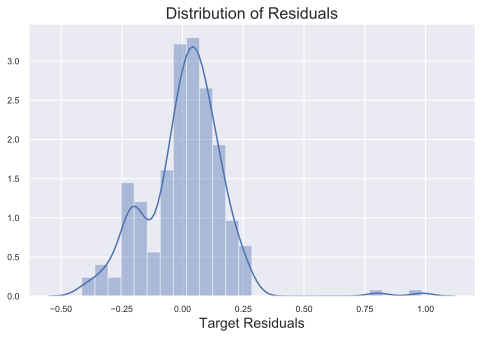

In [101]:
ols_test_residual_7 = y_test - test_pred_ols_7
# Plot distribution of residuals
plt.figure(figsize=(8, 5))
sns.distplot(ols_test_residual_7)
plt.xlabel('Target Residuals', size=14)
sns.despine()
plt.title('Distribution of Residuals', size=16)
plt.savefig('../reports/figures/residual_distribution_appendix.png')
plt.show();

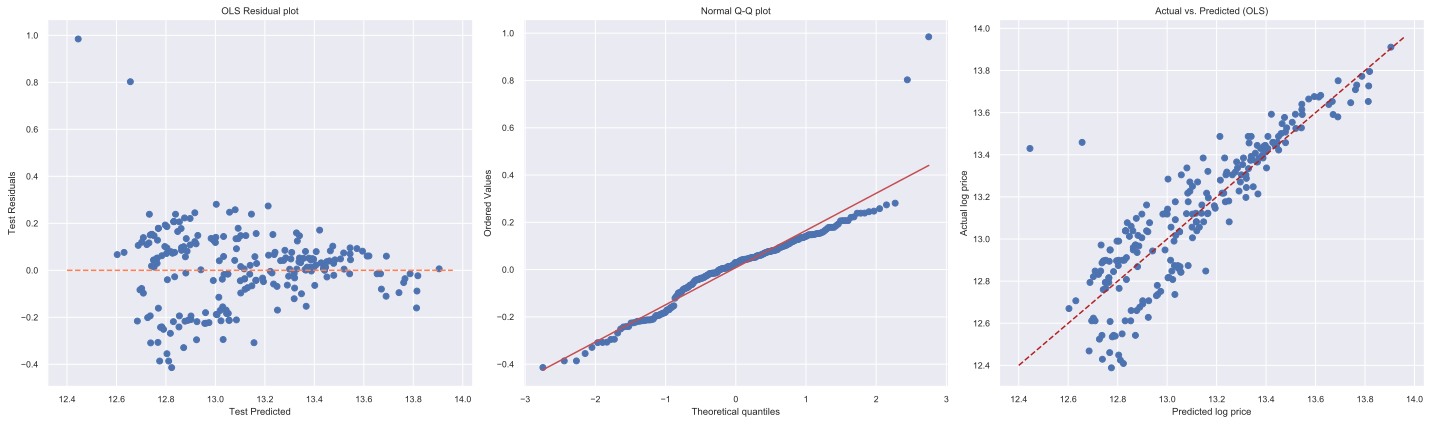

In [102]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.scatter(test_pred_ols_7, ols_test_residual_7)
sns.despine()
plt.plot([12.4, 13.96], [0, 0], '--', color='coral')
plt.title("OLS Residual plot")
plt.xlabel("Test Predicted")
plt.ylabel("Test Residuals")

plt.subplot(1, 3, 2)
stats.probplot(ols_test_residual_7, dist="norm", plot=plt)
sns.despine()
plt.title("Normal Q-Q plot")

plt.subplot(1, 3, 3)
plt.scatter(test_pred_ols_7, y_test)
sns.despine()
plt.plot([12.4, 13.96], [12.4, 13.96], '--', c='firebrick')
plt.xlabel("Predicted log price")
plt.ylabel("Actual log price")
plt.title("Actual vs. Predicted (OLS)")
plt.tight_layout()
# plt.savefig('../reports/figures/selected_features_diagnostic_plot_test_set_ols.png', dpi=600)
plt.show();